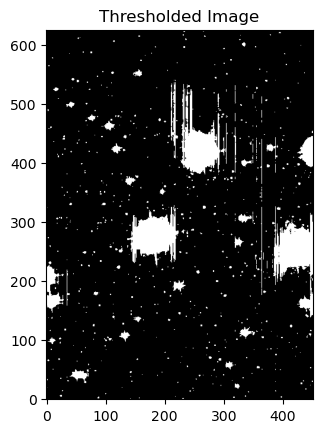

In [3]:
import numpy as np
from PIL import Image
from photutils.detection import DAOStarFinder
from astropy.stats import mad_std
import matplotlib.pyplot as plt

from photutils.datasets import make_gaussian_sources_image
from astropy.table import Table

from sklearn.preprocessing import MinMaxScaler



"""
# Generate synthetic data
shape = (100, 100)  # Image size
sources_data = Table()
sources_data['x_mean'] = [30, 50, 70]  # X positions of stars
sources_data['y_mean'] = [30, 50, 70]  # Y positions of stars
sources_data['flux'] = [500, 1000, 1500]  # Brightness of stars
sources_data['x_stddev'] = [1.5, 2.0, 2.5]  # Star widths (stddev)
sources_data['y_stddev'] = sources_data['x_stddev']
sources_data['theta'] = [0, 0, 0]  # Orientation (not relevant here)

image_array = make_gaussian_sources_image(shape, sources_data)
"""
image = Image.open('Diegotheexplorer.png').convert('L')  # Convert to grayscale
image_array = np.array(image)  # Convert to a numpy array


image_array = image_array.astype(float)  # Convert to float
image_array /= image_array.max()  # Normalize to the range [0, 1]


# Detect stars
""""
sigma = mad_std(image_array)
daofind = DAOStarFinder(fwhm=2.5, threshold=3.0 * sigma)
"""

image_array_scaled = MinMaxScaler().fit_transform(image_array)  # Scale values between 0 and 1
sigma = mad_std(image_array_scaled)
daofind = DAOStarFinder(fwhm=2.0, threshold=5.0 * sigma)

sources = daofind(image_array_scaled)

# Plot and verify
"""plt.imshow(image_array, cmap='gray', origin='lower')
plt.colorbar()
if sources is not None:
    for star in sources:
        plt.plot(star['xcentroid'], star['ycentroid'], 'ro')
plt.title('Detected Stars in Synthetic Image')
plt.show()"""

threshold_mask = image_array_scaled > (5.0 * sigma)
plt.imshow(threshold_mask, cmap='gray', origin='lower')
plt.title('Thresholded Image')
plt.show()
